# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

First, I'll load all the possible necessary libraries

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt



## Load data

Load all the data by reading all the csv files

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

Before preparing the data, call display() on each dataset to see if everything looks good

In [3]:
display(calls)
display(internet)
display(messages)
display(plans)
display(users)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Print a sample of data for plans
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Since plans is such a small dataframe, I just used the display method to showcase it.

 The zero's in the calls and internet dataframes can effect the calculations, depending on the context. If there are too many zero's in the dataframes, it can skew the results and cause misinterpretations.

No issues with plans dataset. Everything looks correct.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users
display(users.sample(10))

#display(user_plans)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
128,1128,Lucius,Fernandez,41,"Knoxville, TN MSA",2018-01-25,ultimate,NaN
444,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,NaN
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaN
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,NaN
151,1151,Ralph,Monroe,21,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-20,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
72,1072,Seymour,Spence,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-12,surf,NaN
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,NaN
409,1409,Elvis,Vargas,38,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-10-04,ultimate,NaN
125,1125,Assunta,Carver,39,"North Port-Sarasota-Bradenton, FL MSA",2018-08-16,surf,NaN


Each column is the appropriate data type. There are only 34 non-null pieces of data in the "churn_date" which means only 34 customers had stopped using the plan. All other entries mean during the time this data was sampled, they were actively using the plan.

## Calls

In [8]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
# Print a sample of data for calls
display(calls.head())
calls['duration'] = np.ceil(calls['duration']).astype(int)
display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


No initial problems with columns from the sample provided. 
Calls can be rounded up and converted to "int" datatypes if necessary. Using np.ceil() can round up the 'duration' column. I displayed the before and after of the 'duration' column after using np.ceil().

### Enrich data

Creating a column for the month to later calculate how much is owed for the monthly plans.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

## Messages

In [11]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
# Print a sample of data for messages
messages.sample(10)


,id,user_id,message_date
47441,1324_155,1324,2018-09-30
75351,1491_159,1491,2018-05-07
2452,1028_366,1028,2018-11-22
5108,1046_170,1046,2018-08-23
59277,1374_451,1374,2018-08-07
23331,1141_144,1141,2018-10-19
43274,1285_115,1285,2018-10-19
56378,1356_49,1356,2018-09-19
44442,1295_98,1295,2018-08-24
75575,1491_483,1491,2018-07-14


There's 3 columns: 'id' showing the unique text id, 'user_id' showing the id of the user, and 'message_date' showing when the text was sent. No obvious erros or missing data.

### Enrich data

Creating a column for the month to later calculate how many messages were sent in each month.

In [13]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

## Internet

In [14]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [15]:
# Print a sample of data for the internet traffic
internet.rename(columns={'mb_used': 'gb_used'}, inplace=True)
internet.head(20)


,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Theres 4 columns: 'id' showing the unqiue session id, 'user_id' showing the user id, 'session_date' showing the web session day, and 'mb_used' showing the amount of data used in megabytes.

### Enrich data

Creating a month column to determine how much data was used per month.

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

## Study plan conditions

In [17]:
# Print out the plan conditions and make sure they are clear for you
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [18]:
# Calculate the number of calls made by each user per month. Save the result.
display(calls)

calls_per_user = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
print(calls_per_user)


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


      user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]


In [19]:
# Calculate the amount of minutes spent by each user per month. Save the result.
duration_per_user = (calls.groupby(['user_id', 'month'])['duration'].sum().reset_index())
print(duration_per_user)

      user_id  month  duration
0        1000     12       124
1        1001      8       182
2        1001      9       315
3        1001     10       393
4        1001     11       426
...       ...    ...       ...
2253     1498     12       339
2254     1499      9       346
2255     1499     10       385
2256     1499     11       308
2257     1499     12       496

[2258 rows x 3 columns]


In [20]:
# Reviewer's code

calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])

count  sum
user_id month            
1000    12        16  124
1001    8         27  182
        9         49  315
        10        65  393
        11        64  426
...              ...  ...
1498    12        39  339
1499    9         41  346
        10        53  385
        11        45  308
        12        65  496

[2258 rows x 2 columns]

In [21]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_user = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
print(messages_per_user)

      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [22]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
traffic_per_user = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
traffic_per_user['gb_used'] = np.ceil(traffic_per_user['gb_used'] / 1024)

print(traffic_per_user)


      user_id  month  gb_used
0        1000     12      2.0
1        1001      8      7.0
2        1001      9     14.0
3        1001     10     22.0
4        1001     11     19.0
...       ...    ...      ...
2272     1498     12     23.0
2273     1499      9     13.0
2274     1499     10     20.0
2275     1499     11     17.0
2276     1499     12     22.0

[2277 rows x 3 columns]


Used the groupby() function to group individual users by the month they used the service, then since the plans round up the amount to the nearest gigabite, used np.ceil() to round up to the nearest thousand.

In [23]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_info_df = calls_per_user.merge(duration_per_user, on=['user_id', 'month'], how='outer')
merged_info_df2 = merged_info_df.merge(messages_per_user, on=['user_id', 'month'], how='outer')
merged_info_final = merged_info_df2.merge(traffic_per_user, on=['user_id', 'month'], how='outer')
merged_info_final.rename(columns={'id_x': 'calls_per_user', 'id_y': 'messages_per_user'}, inplace=True)
merged_info_final['calls_per_user'].fillna(0, inplace=True)
merged_info_final['duration'].fillna(0, inplace=True)
merged_info_final['messages_per_user'].fillna(0, inplace=True)
merged_info_final['gb_used'].fillna(0, inplace=True)
display(merged_info_final)


,user_id,month,calls_per_user,duration,messages_per_user,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


In [24]:
# Add the plan information
user_stats_plan = merged_info_final.merge(users, on='user_id', how='left')
columns_to_drop = ['first_name', 'last_name', 'age', 'reg_date']
user_stats_plan.drop(columns=columns_to_drop, inplace=True)
display(user_stats_plan)


,user_id,month,calls_per_user,duration,messages_per_user,gb_used,city,plan,churn_date
0,1000,12,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN
1,1001,8,27.0,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN
2,1001,9,49.0,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN
3,1001,10,65.0,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN
4,1001,11,64.0,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,NaN
2289,1361,5,0.0,0.0,2.0,2.0,"Birmingham-Hoover, AL MSA",surf,NaN
2290,1482,10,0.0,0.0,2.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,NaN
2291,1108,12,0.0,0.0,0.0,1.0,"Salt Lake City, UT MSA",ultimate,NaN


First, create a function with all the parameters of the data plans. Then, use and if-else loop to filter through the 'plan' column and calculate the total price owed depending on which plan the user has chosen. Display the dataframe to make sure the function ran properly.

In [25]:
# Calculate the monthly revenue for each user
display(plans)

def plan_pricing(row):
    surf_monthly_charge = plans.loc[0, 'usd_monthly_pay']
    surf_minutes_limit = plans.loc[0, 'minutes_included']
    surf_text_limit = plans.loc[0, 'messages_included']
    surf_data_limit = plans.loc[0, 'mb_per_month_included'] / 1024
    surf_extra_minute_price = plans.loc[0, 'usd_per_minute']
    surf_extra_text_price = plans.loc[0, 'usd_per_message']
    surf_extra_gb_price = plans.loc[0, 'usd_per_gb']

    ultimate_monthly_charge = plans.loc[1, 'usd_monthly_pay']
    ultimate_minutes_limit = plans.loc[1, 'minutes_included']
    ultimate_text_limit = plans.loc[1, 'messages_included']
    ultimate_data_limit = plans.loc[1, 'mb_per_month_included'] / 1024
    ultimate_extra_minute_price = plans.loc[1, 'usd_per_minute']
    ultimate_extra_text_price = plans.loc[1, 'usd_per_message']
    ultimate_extra_gb_price = plans.loc[1, 'usd_per_gb']
    
    
    if row['plan'] == 'surf':
        surf_extra_minutes = max(row['duration'] - surf_minutes_limit, 0) * surf_extra_minute_price
        surf_extra_texts = max(row['messages_per_user'] - surf_text_limit, 0) * surf_extra_text_price
        surf_extra_gbs = max(row['gb_used'] - surf_data_limit, 0) * surf_extra_gb_price
        total_charge = surf_monthly_charge + surf_extra_minutes + surf_extra_texts + surf_extra_gbs
        
    elif row['plan'] == 'ultimate':
        ultimate_extra_minutes = max(row['duration'] - ultimate_minutes_limit, 0) * ultimate_extra_minute_price
        ultimate_extra_texts = max(row['messages_per_user'] - ultimate_text_limit, 0) * ultimate_extra_text_price
        ultimate_extra_gbs = max(row['gb_used'] - ultimate_data_limit, 0) * ultimate_extra_gb_price
        total_charge = ultimate_monthly_charge + ultimate_extra_minutes + ultimate_extra_texts + ultimate_extra_gbs
        
    else:
        total_charge = None
        
    
    return total_charge

user_stats_plan['total_charge'] = user_stats_plan.apply(plan_pricing, axis=1)
display(user_stats_plan)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,month,calls_per_user,duration,messages_per_user,gb_used,city,plan,churn_date,total_charge
0,1000,12,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,NaN,70.00
1,1001,8,27.0,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,20.00
2,1001,9,49.0,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,20.00
3,1001,10,65.0,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,90.09
4,1001,11,64.0,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,NaN,60.00
...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,NaN,20.33
2289,1361,5,0.0,0.0,2.0,2.0,"Birmingham-Hoover, AL MSA",surf,NaN,20.00
2290,1482,10,0.0,0.0,2.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,NaN,70.00
2291,1108,12,0.0,0.0,0.0,1.0,"Salt Lake City, UT MSA",ultimate,NaN,70.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

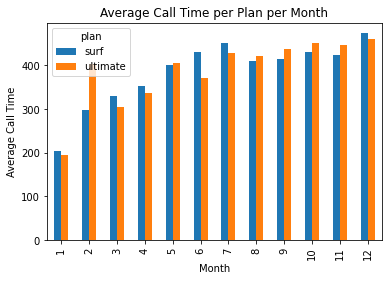

In [26]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_duration = user_stats_plan.groupby(['plan', 'month'])['duration'].mean()
avg_duration = avg_duration.reset_index()
avg_duration = avg_duration.pivot_table(values='duration', index='month', columns='plan')
avg_duration.plot(kind='bar', 
                 xlabel='Month', 
                 ylabel='Average Call Time', 
                 title='Average Call Time per Plan per Month', 
                 )
plt.show()

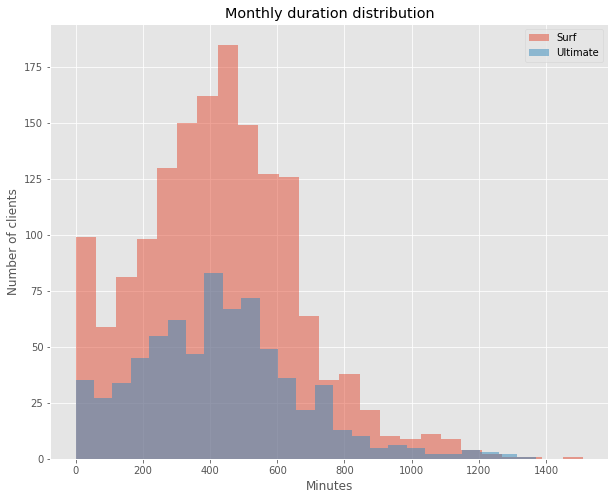

In [27]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.style.use('ggplot')

user_stats_plan.groupby('plan')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Monthly duration distribution')
plt.xlabel('Minutes')
plt.ylabel('Number of clients')

plt.show()

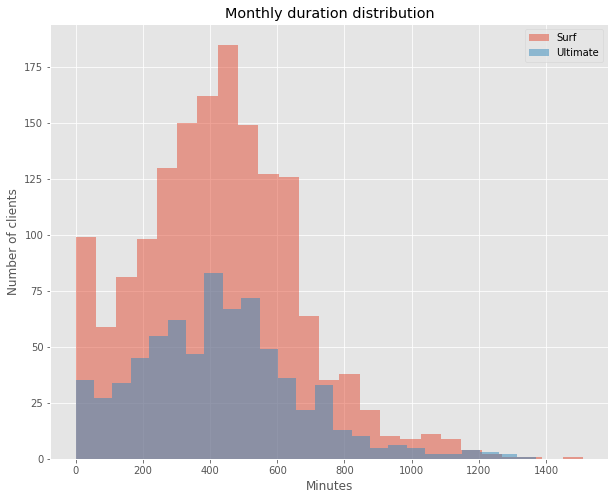

In [28]:
# Reviewer's code 2

plt.style.use('ggplot') # Add style. You can put it in the very first cell, after plt is defined.

user_stats_plan.groupby('plan')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Monthly duration distribution')
plt.xlabel('Minutes')
plt.ylabel('Number of clients')

plt.show()

First group the plans using groupby() and then get the mean, variance, and standard deviation in the grouped data.

In [29]:
# Calculate the mean and the variance of the monthly call duration
plan_groups = user_stats_plan.groupby('plan')
mean_duration = plan_groups['duration'].mean()
variance_duration = plan_groups['duration'].var()
std_duration = np.sqrt(variance_duration)

print('The mean monthly call duration is: ', mean_duration)
print('The variance of the monthly call duration is: ', variance_duration)
print('The standard deviation is: ', std_duration)

The mean monthly call duration is:  plan
surf        428.749523
ultimate    430.450000
Name: duration, dtype: float64
The variance of the monthly call duration is:  plan
surf        54968.279461
ultimate    57844.464812
Name: duration, dtype: float64
The standard deviation is:  plan
surf        234.453150
ultimate    240.508762
Name: duration, dtype: float64


In [30]:
# Reviewer's code 3

user_stats_plan.pivot_table(index='plan', values=['duration', 'messages_per_user', 'gb_used'],
                       aggfunc=['mean', 'std', 'var'])

mean                                      std            \
            duration    gb_used messages_per_user    duration   gb_used   
plan                                                                      
surf      428.749523  16.670693         31.159568  234.453150  7.847522   
ultimate  430.450000  17.306944         37.551389  240.508762  7.670108   

                                     var                              
         messages_per_user      duration   gb_used messages_per_user  
plan                                                                  
surf             33.566717  54968.279461  61.58360       1126.724522  
ultimate         34.767179  57844.464812  58.83055       1208.756744

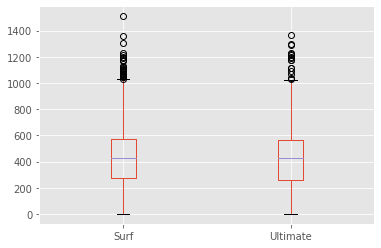

In [31]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plans_time = user_stats_plan.groupby('plan')

box_plot_time = pd.DataFrame({
    'Surf': plans_time.get_group('surf')['duration'],
    'Ultimate': plans_time.get_group('ultimate')['duration']
})
box_plot_time.boxplot()
plt.show()

 Based on the boxplot, the users are very similar in their call times. The Surf plan users seem to have a slighter higher call duration from Q1 to Q3, and a few larger outliers in comparison to the Ultimate plan users.

### Messages

In [32]:
# Compare the number of messages users of each plan tend to send each month

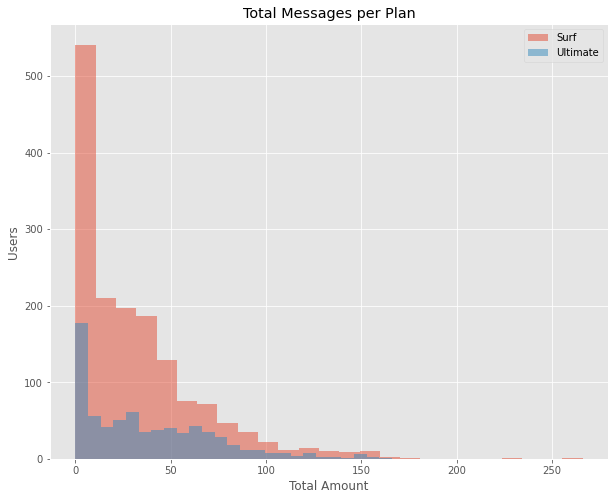

The mean monthly message amount is:  plan
surf        31.159568
ultimate    37.551389
Name: messages_per_user, dtype: float64
The variance of the monthly message amount is:  plan
surf        1126.724522
ultimate    1208.756744
Name: messages_per_user, dtype: float64
The standard deviation is:  plan
surf        33.566717
ultimate    34.767179
Name: messages_per_user, dtype: float64


In [33]:
user_stats_plan.groupby('plan')['messages_per_user'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Total Messages per Plan')
plt.xlabel('Total Amount')
plt.ylabel('Users')

plt.show()

plan_messages = user_stats_plan.groupby('plan')
mean_messages = plan_messages['messages_per_user'].mean()
variance_messages = plan_messages['messages_per_user'].var()
std_messages = np.sqrt(variance_messages)

print('The mean monthly message amount is: ', mean_messages)
print('The variance of the monthly message amount is: ', variance_messages)
print('The standard deviation is: ', std_messages)

Based on the histogram, the mean, and the variance of the monthly message amount, it would seem that the surf and ultimate plan users are very close in their message amounts, with the ultimate plan users having slightly more messages per month.

### Internet

In [34]:
# Compare the amount of internet traffic consumed by users per plan

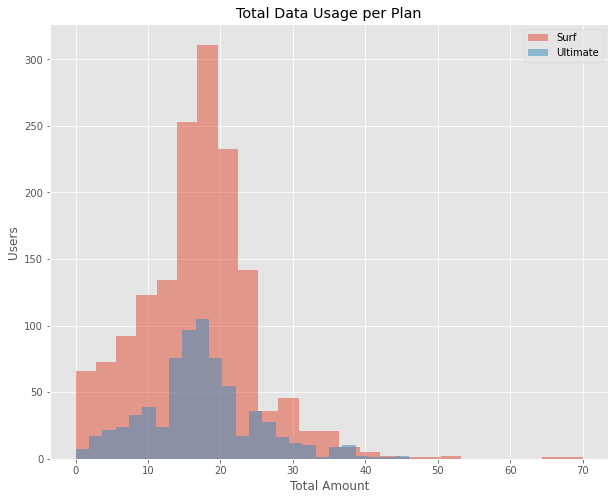

The mean monthly data usage is:  plan
surf        16.670693
ultimate    17.306944
Name: gb_used, dtype: float64
The variance of the monthly data usage is:  plan
surf        61.58360
ultimate    58.83055
Name: gb_used, dtype: float64
The standard deviation is:  plan
surf        7.847522
ultimate    7.670108
Name: gb_used, dtype: float64


In [35]:
user_stats_plan.groupby('plan')['gb_used'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Total Data Usage per Plan')
plt.xlabel('Total Amount')
plt.ylabel('Users')

plt.show()

plan_traffic = user_stats_plan.groupby('plan')
mean_traffic = plan_traffic['gb_used'].mean()
variance_traffic = plan_traffic['gb_used'].var()
std_traffic = np.sqrt(variance_traffic)

print('The mean monthly data usage is: ', mean_traffic)
print('The variance of the monthly data usage is: ', variance_traffic)
print('The standard deviation is: ', std_traffic)

Based on the histogram, mean, and variance of the monthly data usage, it would seem the surf and ultimate users are very close in similarity, with the ultimate plan users having a slightly higher amount of data usage per month.

## Revenue

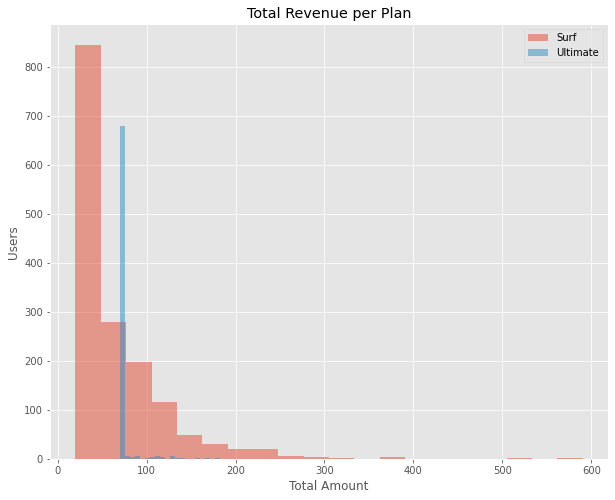

The mean monthly revenue is:  plan
surf        60.706408
ultimate    72.313889
Name: total_charge, dtype: float64
The variance of the monthly revenue is:  plan
surf        3067.835152
ultimate     129.848486
Name: total_charge, dtype: float64
The standard deviation is:  plan
surf        55.388042
ultimate    11.395108
Name: total_charge, dtype: float64


In [36]:
user_stats_plan.groupby('plan')['total_charge'].plot.hist(alpha=0.5, legend=True, bins=20, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Total Revenue per Plan')
plt.xlabel('Total Amount')
plt.ylabel('Users')

plt.show()


plan_rev = user_stats_plan.groupby('plan')
mean_rev = plan_rev['total_charge'].mean()
variance_rev = plan_rev['total_charge'].var()
std_rev = np.sqrt(variance_rev)

print('The mean monthly revenue is: ', mean_rev)
print('The variance of the monthly revenue is: ', variance_rev)
print('The standard deviation is: ', std_rev)

The total revenue between the surf plan users and ultimate plan users is drastically different. A large amount of surf plan users went well over their monthly plan limits, where as the ultimate plan users mostly stayed within their monthly plan limits.

## Test statistical hypotheses

Null Hypothesis (H0): The average revenue from Surf and Ultimate users are the same.
Alternative Hypothesis (H1): The average revenue from Surf and Ultimate users are different.

In [37]:
# Test the hypotheses
surf_total_charge = user_stats_plan.loc[user_stats_plan['plan'] == 'surf', 'total_charge']
ultimate_total_charge = user_stats_plan.loc[user_stats_plan['plan'] == 'ultimate', 'total_charge']

results = st.ttest_ind(ultimate_total_charge, surf_total_charge, equal_var=False)

alpha = 0.05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We can reject the null hypothesis due to the significant difference between average revenues between the plans.')
else:
    print("We can't reject the null hypothesis since there is no significant difference between the average revenues of the plans.")


p-value: 3.17039054811355e-15
We can reject the null hypothesis due to the significant difference between average revenues between the plans.


Null Hypothesis (H0): The average revenue in NY-NJ is the same as the average of other areas.
Alternative Hypothesis (H1): The average revenue in NY-NJ is different from other areas.

In [39]:
# Test the hypotheses
nynj_rev = user_stats_plan[user_stats_plan['city'].str.contains('NY-NJ', na=False)]['total_charge']
other_rev = user_stats_plan[~user_stats_plan['city'].str.contains('NY-NJ', na=False)]['total_charge']

results_rev = st.ttest_ind(nynj_rev, other_rev)

alpha = 0.05

p_value = (results_rev.pvalue)

if p_value < alpha:
    print("We can reject the null hypothesis due to the significant difference in the average revenue from customers in NY-NJ and the rest of the regions.")
else:
    print("We can't reject the null hypothesis since there is no significant difference.")
print('p-value: ',p_value)

We can reject the null hypothesis due to the significant difference in the average revenue from customers in NY-NJ and the rest of the regions.
p-value:  0.043557431621342436


In [ ]:
# Reviewer's code 3 

print(nynj_rev, '\n====')

display(user_stats_plan['city'])


print('=' * 10)

user_stats_plan[user_stats_plan['city'] == 'NY-NJ']

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

To figure out which plan brings in more revenue, I conducted an analysis on 500 customers, some of which had the Surf plan, and some of which had the Ultimate plan. I looked at the amount of call time, messages, and data between the users of both plans to then calculate the total revenue of each user. When looking at the averages of each of these, it's clear that the Surf plan users, more often than not, went over their plan limits. Below, I added the total amounts of revenue from all the users of each plan together. The surf plan total revenue is almost double that of the ultimate plan total revenue. 
The plan that is better to bring in more revenue is the Surf plan.
The plan that is better for the customer to save money is the Ultimate plan.

In [ ]:
total_amount_by_plan = user_stats_plan.groupby('plan')['total_charge'].sum()

print(total_amount_by_plan)